# Propagación de un paquete

Importamos bibliotecas varias

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

Definimos los parámetros de la simulación, el número de puntos en la grilla, los límites izquierdo y derecho, calculamos $\Delta x$, definimos $\hbar$, la masa, la constante de fuerza. $t$ es $\frac{\hbar^2}{2m}\frac{1}{(\Delta x)^2}$

In [40]:
ngrid = 3001
xmin = -30.0
xmax =  30.0
deltax = (xmax - xmin) / float(ngrid-1)
hbar = 1.0
mass = 1.0
dt = 0.01
t = hbar**2 / (2.0 * mass * deltax**2)

Grilla en el espacio real entre los límites

In [41]:
xgrid = np.linspace(xmin, xmax, ngrid)

$\delta_{ij}$ la delta de Kronecker

In [42]:
def kdelta(k, l):
    if k == l: return True
    else: return False

La función potencial

In [43]:
def V(x):
    if (x<0.5) and (x>-0.5):
        return 5.0
    else:
        return 0.0

Definimos el operador Hamiltoniano

In [44]:
H = np.zeros((ngrid,ngrid))
for i in range(0,ngrid):
    for j in range(0,ngrid):
        if kdelta(i,j+1):
            H[i,j] = - t / 1.0
        if kdelta(i,j-1):
            H[i,j] = - t / 1.0 
        if kdelta(i,j):
            H[i,j] = 2.0 * t + V(xgrid[i])

El potencial

(0.0, 20.0)

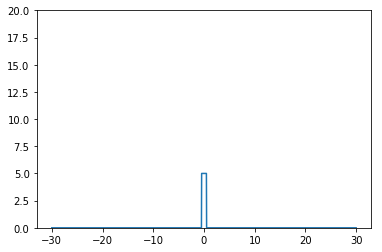

In [45]:
vvals = np.zeros_like(xgrid)
for i,x in enumerate(xgrid):
    vvals[i] = V(xgrid[i])
plt.plot(xgrid,vvals)
plt.ylim(0.0,20.0)

Construyamos el propagador de Crank-Nicholson, es $$\hat{U}=\frac{\hat{I}-\frac{i}{\hbar}\frac{\Delta t}{2}\hat{H}}{\hat{I}+\frac{i}{\hbar}\frac{\Delta t}{2}\hat{H}}$$

In [46]:
numerador = np.identity(ngrid) - ((0.0+1.0j)*dt/hbar/2.0) * H
denominador = np.identity(ngrid) + ((0.0+1.0j)*dt/hbar/2.0) * H
U = np.dot(numerador,np.linalg.inv(denominador))

Paquete de incerteza mínima

In [47]:
sigmax = 0.75
pinicial = 2.0
xinicial = -6.0
psi0 = (1.0/(math.pi**(0.25)*math.sqrt(sigmax)))*np.exp(-(xgrid-xinicial)**2/(2.0*sigmax**2)+1.0j*pinicial*(xgrid-xinicial))

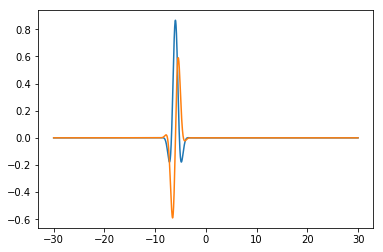

In [48]:
plt.plot(xgrid,psi0.real)
plt.plot(xgrid,psi0.imag)

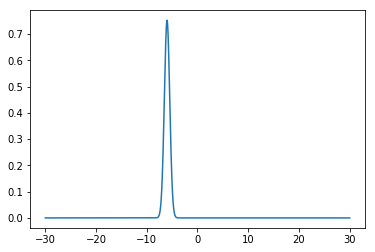

In [49]:
plt.plot(xgrid,np.absolute(psi0*psi0))

In [50]:
ntimes = 1000
psis = np.zeros((ntimes,ngrid),dtype=psi0.dtype)
psis[0,:] = psi0
for i in range(1,ntimes):
    psis[i,:] = np.dot(U,psis[i-1,:])

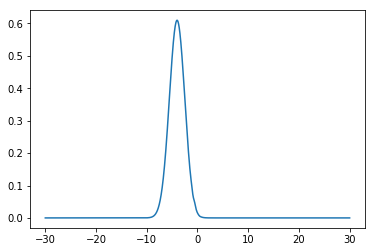

In [51]:
plt.plot(xgrid,np.absolute(psis[99,:]))

In [52]:
from matplotlib import animation, rc
from IPython.display import HTML

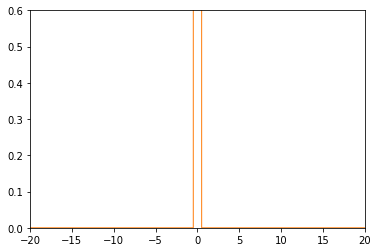

In [53]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -20, 20))
ax.set_ylim((0, 0.6))

line, = ax.plot([], [], lw=1)
line2, = ax.plot(xgrid, vvals, lw=1)

In [54]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [55]:
# animation function. This is called sequentially
def animate(i):
    line.set_data(xgrid, np.absolute(psis[i,:]))
    return (line,)

In [56]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=ntimes, interval=30, blit=True)

In [57]:
HTML(anim.to_html5_video())